In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
low_memory=False

df = pd.read_csv("D:\Downloads\supervised_dataset.csv",sep=",", low_memory=False)  #завантажит дані
df.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1695 non-null   int64  
 1   _id                             1695 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1695 non-null   float64
 5   vsession_duration(min)          1695 non-null   int64  
 6   ip_type                         1695 non-null   object 
 7   num_sessions                    1695 non-null   float64
 8   num_users                       1695 non-null   float64
 9   num_unique_apis                 1695 non-null   float64
 10  source                          1695 non-null   object 
 11  classification                  1695 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [3]:
s = df['ip_type']
s, unique = pd.factorize(s)  #кожний клас отримає int мітку
df['ip_type'] = s 
df['ip_type'].value_counts()

0    1542
1     153
Name: ip_type, dtype: int64

In [4]:
s = df['source']
s, unique = pd.factorize(s) 
df['source'] = s 
df['source'].value_counts()

0    1495
1     200
Name: source, dtype: int64

In [5]:
s = df['classification']
s, unique = pd.factorize(s) 
df['classification'] = s 
df['classification'].value_counts()

0    1106
1     589
Name: classification, dtype: int64

In [6]:
df=df.drop([ '_id','Unnamed: 0'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  1695 non-null   float64
 1   api_access_uniqueness           1695 non-null   float64
 2   sequence_length(count)          1695 non-null   float64
 3   vsession_duration(min)          1695 non-null   int64  
 4   ip_type                         1695 non-null   int64  
 5   num_sessions                    1695 non-null   float64
 6   num_users                       1695 non-null   float64
 7   num_unique_apis                 1695 non-null   float64
 8   source                          1695 non-null   int64  
 9   classification                  1695 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 132.5 KB


In [8]:
corr = df.corr()  #кореляція між фічами, чим більше по модулю, тим більша залежність
np.fill_diagonal(corr.values, 0)
corr.replace(0, np.nan, inplace=True)
corr

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
inter_api_access_duration(sec),NaN,0.072424,-0.003418,0.149669,0.092723,-0.033008,-0.029199,-0.047715,0.082434,0.094405
api_access_uniqueness,0.072424,NaN,-0.080800,-0.006048,0.252347,-0.275642,-0.247108,-0.392042,-0.091384,0.767884
sequence_length(count),-0.003418,-0.080800,NaN,0.142744,0.104891,-0.084133,-0.080589,0.018244,-0.086309,0.249645
vsession_duration(min),0.149669,-0.006048,0.142744,NaN,-0.021580,-0.043159,-0.035166,-0.013865,-0.027222,0.114413
ip_type,0.092723,0.252347,0.104891,-0.021580,NaN,-0.148365,-0.133099,-0.210821,-0.051394,0.431642
num_sessions,-0.033008,-0.275642,-0.084133,-0.043159,-0.148365,NaN,0.929199,0.525890,-0.138609,-0.343982
num_users,-0.029199,-0.247108,-0.080589,-0.035166,-0.133099,0.929199,NaN,0.541066,-0.110880,-0.308356
num_unique_apis,-0.047715,-0.392042,0.018244,-0.013865,-0.210821,0.525890,0.541066,NaN,-0.217218,-0.450704
source,0.082434,-0.091384,-0.086309,-0.027222,-0.051394,-0.138609,-0.110880,-0.217218,NaN,-0.151698
classification,0.094405,0.767884,0.249645,0.114413,0.431642,-0.343982,-0.308356,-0.450704,-0.151698,NaN


In [9]:
df=df.drop([ 'inter_api_access_duration(sec)'], axis = 1)

In [10]:
trgt = ["classification"]      
dfprep = df.columns.drop(trgt) #викидаємо класифікації
train,test = train_test_split(df,test_size = 0.33)  #розбиваємо датасет на тренувальну/тестову вибірку
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       193

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



<AxesSubplot:>

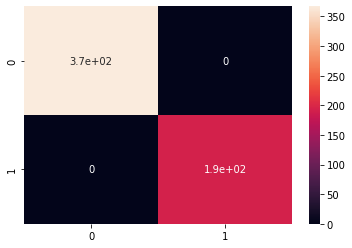

In [11]:
from sklearn.naive_bayes import GaussianNB  #Алгоритм Байєсa
nb = GaussianNB()
nb.fit(xTrain,yTrain.values.ravel())
yPred = nb.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [12]:
param_grid ={'n_neighbors': [3,5,7,9,11]}   #к-сть сусідів, що перевір
knnModel = KNeighborsClassifier()    #кнн алгоритм
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())                       #процесс обучения, подгонка
results = pd.DataFrame(grid_search.cv_results_)  #запис результатів передбачення
print("The best score is", grid_search.best_score_) # оптимальні параметри
print("The best parameters are:\n", grid_search.best_estimator_) #best is 11

The best score is 0.9709251101321585
The best parameters are:
 KNeighborsClassifier(n_neighbors=3)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       367
           1       0.98      0.95      0.97       193

    accuracy                           0.98       560
   macro avg       0.98      0.97      0.97       560
weighted avg       0.98      0.98      0.98       560



<AxesSubplot:>

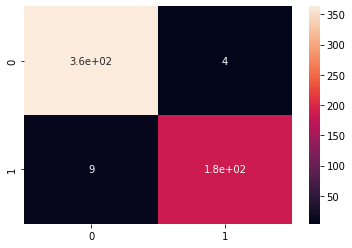

In [13]:
knnModel = KNeighborsClassifier(n_neighbors=3) #knn метод 
knnModel.fit(xTrain,yTrain.values.ravel())
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       193

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



<AxesSubplot:>

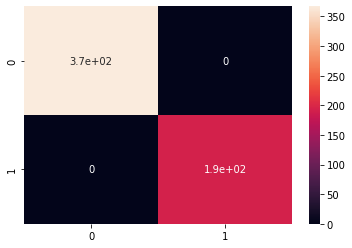

In [14]:
from sklearn.linear_model import LogisticRegression  #логістична регресія
clf = LogisticRegression(max_iter=1000)
clf.fit(xTrain,yTrain.values.ravel())
yPred = clf.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [15]:
param_grid = {'C': [0.1, 1, 10, 25],'gamma': [0.1, 0.05, 0.03, 0.07, 0.01]} #1|c- избежать неправильной классификации
SVC_clsfr = SVC(kernel='rbf')   # гамма - область принятие решения, разброс
grid_search = GridSearchCV(SVC_clsfr, param_grid,      #радиально базисне ядро
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.8317180616740089
The best parameters are:
 SVC(C=10, gamma=0.01)


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       367
           1       1.00      0.34      0.51       193

    accuracy                           0.77       560
   macro avg       0.87      0.67      0.68       560
weighted avg       0.83      0.77      0.73       560



<AxesSubplot:>

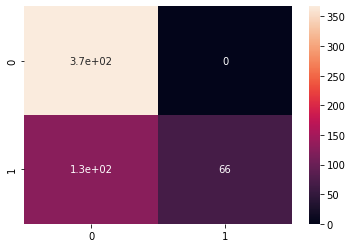

In [16]:
SVC_clsfr = SVC(kernel='rbf', C=10, gamma=0.1)  
SVC_clsfr.fit(xTrain,yTrain.values.ravel()) 
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

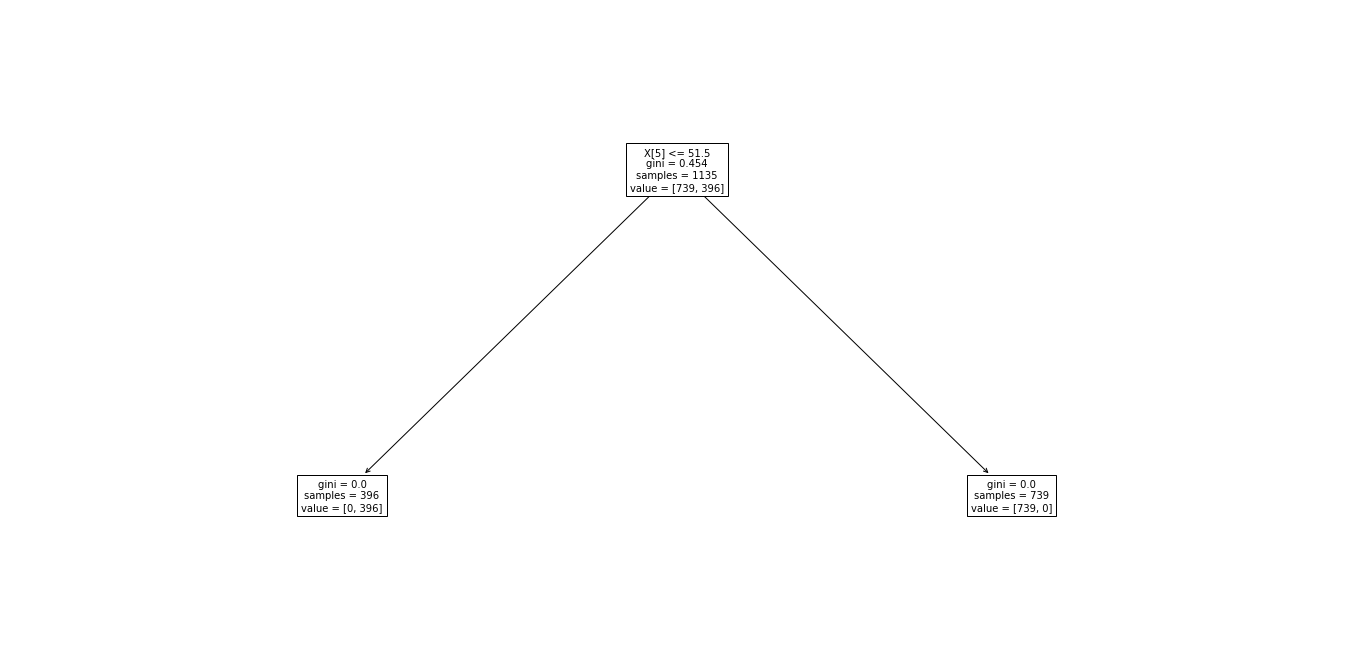

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       193

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



<AxesSubplot:>

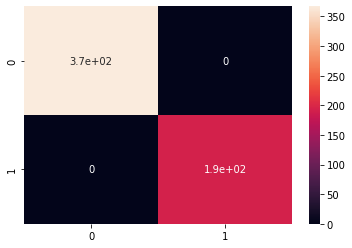

In [17]:
dTree = DecisionTreeClassifier(max_depth=10, max_features=8)   #бо дерево жадібне
dTree.fit(xTrain, yTrain)
plt.figure(figsize=(24,12))
plot_tree(dTree, fontsize=10)
plt.show()
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [18]:
from sklearn.cluster import DBSCAN

epsilon = 1000
min_samples = 13

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 158


In [19]:
continuousColumns = ["api_access_uniqueness","sequence_length(count)", "vsession_duration(min)","ip_type","num_sessions", "num_users", "num_unique_apis", "source"]
minMaxScaler = MinMaxScaler() #масштабирует в приделах задан. диапазона 0-1, именно колонки
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)

In [20]:
from sklearn.decomposition import PCA
pca = PCA()   
X_pca = pca.fit_transform(scaledColums)  #пса работает на колонках
exp_var_pca = pca.explained_variance_ratio_  #вектор- дисперсия для кажд столбика(фичи) 
cum_sum_eigenvalues = np.cumsum(exp_var_pca) #вернет сумму по дисперсии

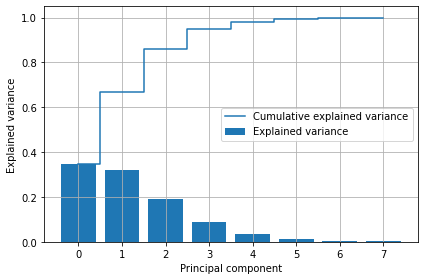

In [21]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()#збережемо 65% з 2ма PCA

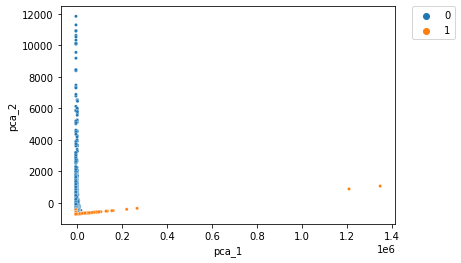

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': df.classification})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

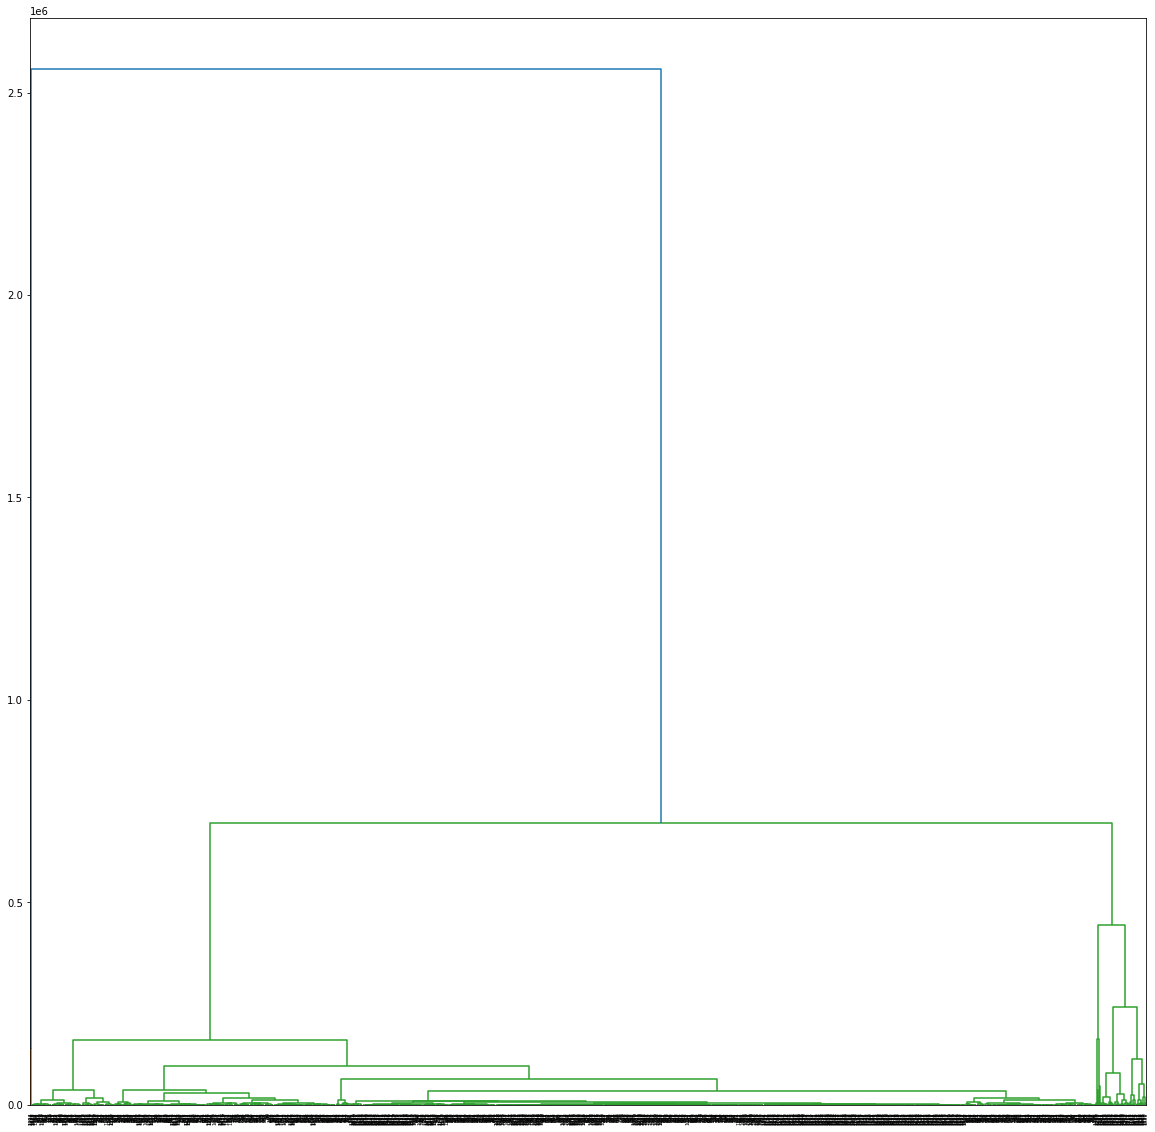

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram , linkage

Z = hierarchy.linkage(df, 'ward')
plt.figure(figsize=(20, 20))
dn = hierarchy.dendrogram(Z)